In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('house_sorting.csv')

In [3]:
df.head()

,Blood Status,Bravery,Intelligence,Loyalty,Ambition,Dark Arts Knowledge,Quidditch Skills,Dueling Skills,Creativity,House
0,Half-blood,9,4,7,5,0,8,8,7,Gryffindor
1,Muggle-born,6,8,5,7,5,6,4,9,Ravenclaw
2,Pure-blood,1,4,7,7,1,4,4,6,Hufflepuff
3,Pure-blood,9,1,3,4,1,9,10,1,Gryffindor
4,Muggle-born,5,9,7,3,3,6,7,9,Ravenclaw


In [4]:
df.isnull().sum()

Blood Status           0
Bravery                0
Intelligence           0
Loyalty                0
Ambition               0
Dark Arts Knowledge    0
Quidditch Skills       0
Dueling Skills         0
Creativity             0
House                  0
dtype: int64

In [5]:
df.shape

(1000, 10)

In [6]:
df.describe()

,Bravery,Intelligence,Loyalty,Ambition,Dark Arts Knowledge,Quidditch Skills,Dueling Skills,Creativity
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,5.026000,5.28100,5.129000,5.136000,4.040000,5.46000,6.223000,5.208000
std,2.682633,2.66179,2.695111,2.716041,3.112248,2.74881,2.833249,2.730969
min,1.000000,1.00000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
25%,3.000000,3.00000,3.000000,3.000000,1.000000,4.00000,4.000000,3.000000
50%,5.000000,5.00000,5.000000,5.000000,3.000000,6.00000,7.000000,5.000000
75%,7.000000,7.00000,7.000000,7.000000,7.000000,7.00000,9.000000,7.000000
max,10.000000,10.00000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000


In [7]:
df['House'].value_counts()

House
Slytherin     265
Ravenclaw     258
Hufflepuff    251
Gryffindor    226
Name: count, dtype: int64

In [8]:
df = df.drop(columns=['Blood Status'])

In [9]:
df.head()

,Bravery,Intelligence,Loyalty,Ambition,Dark Arts Knowledge,Quidditch Skills,Dueling Skills,Creativity,House
0,9,4,7,5,0,8,8,7,Gryffindor
1,6,8,5,7,5,6,4,9,Ravenclaw
2,1,4,7,7,1,4,4,6,Hufflepuff
3,9,1,3,4,1,9,10,1,Gryffindor
4,5,9,7,3,3,6,7,9,Ravenclaw


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

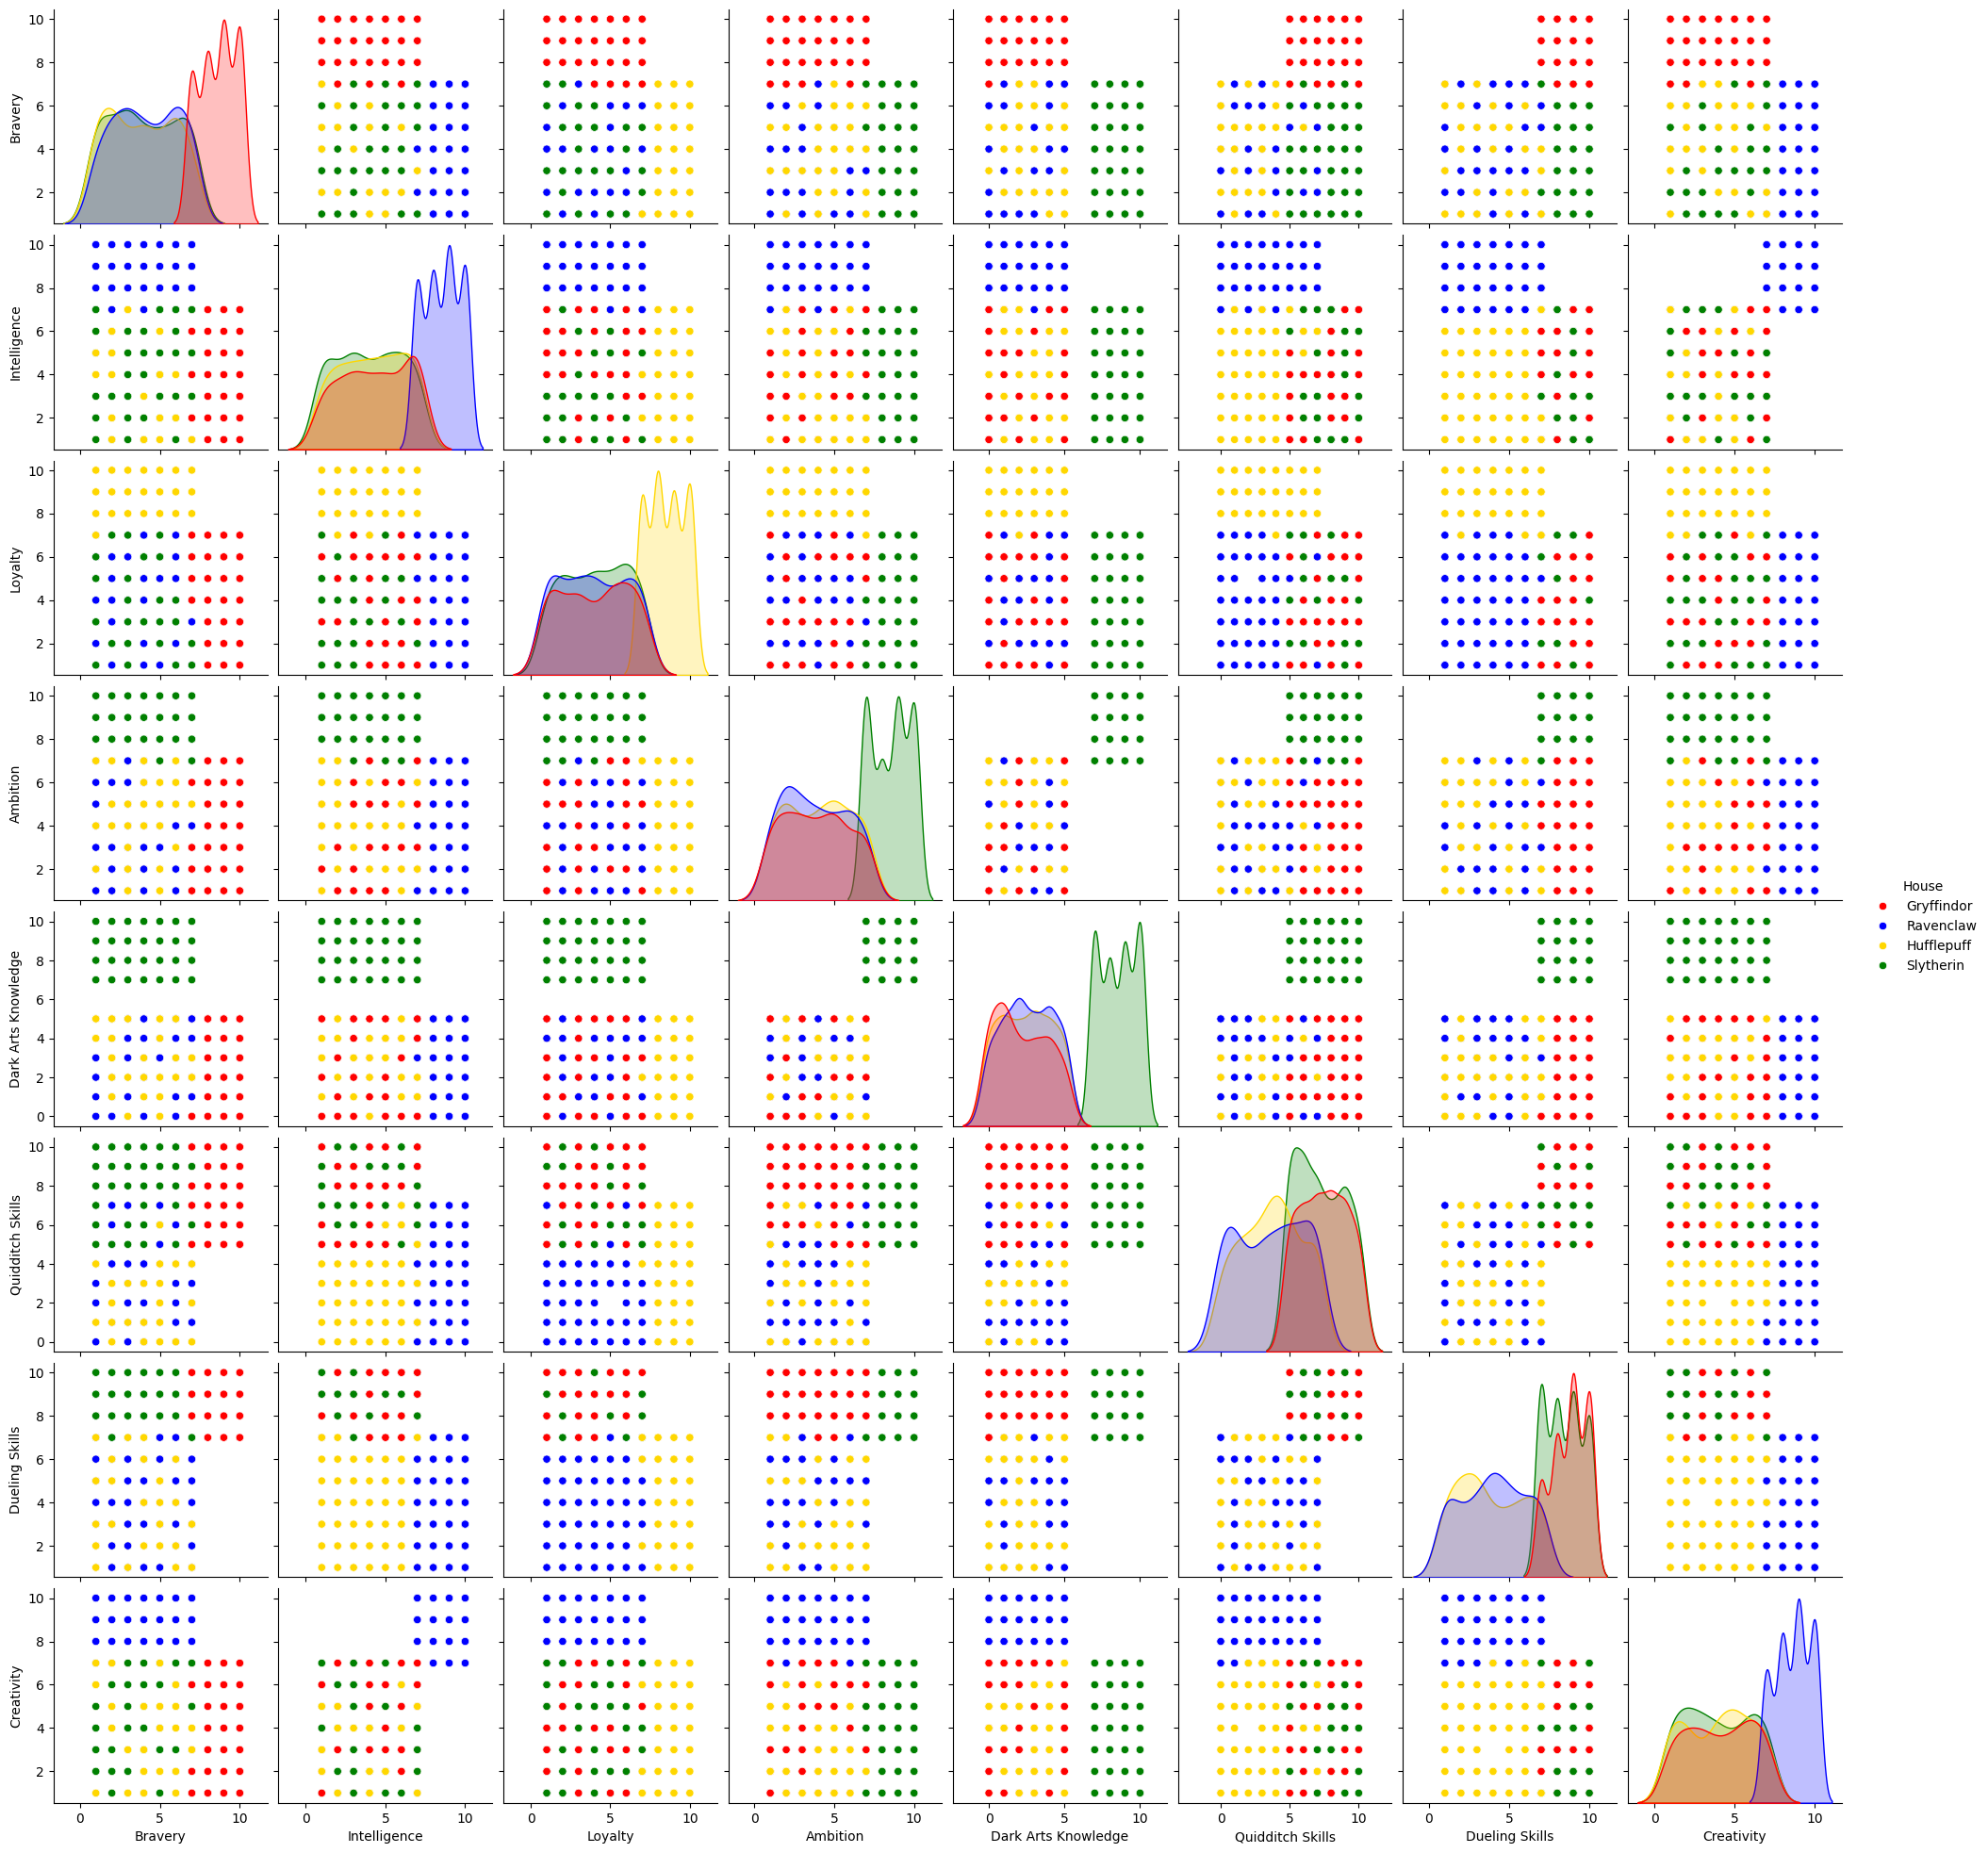

In [11]:
palette = {'Gryffindor': 'red', 'Ravenclaw': 'blue', 'Hufflepuff': 'gold', 'Slytherin': 'green'}
sns.pairplot(df, hue='House', palette=palette)

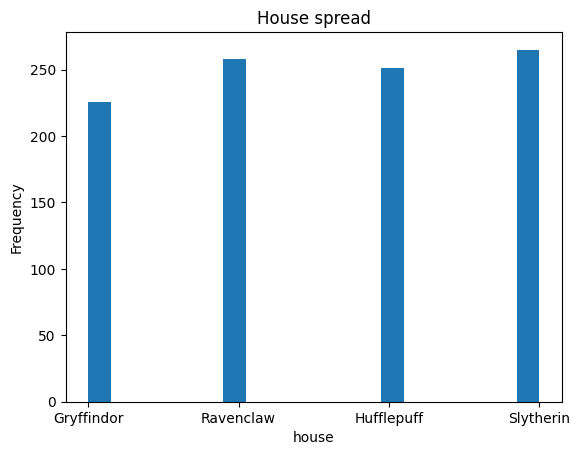

In [12]:
plt.hist(df['House'],bins=20)
plt.xlabel("house")
plt.ylabel("Frequency")
plt.title("House spread")
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

In [14]:
x = df.drop(columns=['House'])
y = df['House']

In [15]:
x.head()

,Bravery,Intelligence,Loyalty,Ambition,Dark Arts Knowledge,Quidditch Skills,Dueling Skills,Creativity
0,9,4,7,5,0,8,8,7
1,6,8,5,7,5,6,4,9
2,1,4,7,7,1,4,4,6
3,9,1,3,4,1,9,10,1
4,5,9,7,3,3,6,7,9


In [16]:
y.head()

0    Gryffindor
1     Ravenclaw
2    Hufflepuff
3    Gryffindor
4     Ravenclaw
Name: House, dtype: object

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=50)

In [18]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [19]:
x_train_scaled

array([[-0.01115203,  0.66172354, -1.53966397, ...,  1.28712177,
         1.33778249, -0.07509184],
       [-1.12635514,  0.66172354, -0.42227857, ..., -1.62368365,
        -0.77034487,  1.76765272],
       [ 0.73231671,  1.40627885,  0.32264503, ..., -0.89598229,
        -1.47305399,  0.66200598],
       ...,
       [-1.49808951,  0.28944588, -0.79474037, ..., -0.16828094,
         0.63507337, -0.44364075],
       [ 1.10405108, -0.08283178, -0.42227857, ...,  0.92327109,
         1.33778249, -1.18073858],
       [-0.75462077,  0.66172354,  0.69510683, ..., -0.16828094,
        -0.41899031, -0.07509184]])

In [20]:
    best_acc = 0
    best_n = 1
    for n in range(1, 20):
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(x_train_scaled, y_train)
        pred = knn.predict(x_test_scaled)
        acc = accuracy_score(y_test, pred)
        if acc > best_acc:
            best_acc = acc
            best_n = n
        print(f"KNN (n_neighbors={n}): Test Accuracy = {acc:.4f}")

    print(f"\nBest n_neighbors: {best_n} with accuracy {best_acc:.4f}")

KNN (n_neighbors=1): Test Accuracy = 1.0000
KNN (n_neighbors=2): Test Accuracy = 1.0000
KNN (n_neighbors=3): Test Accuracy = 1.0000
KNN (n_neighbors=4): Test Accuracy = 0.9950
KNN (n_neighbors=5): Test Accuracy = 0.9950
KNN (n_neighbors=6): Test Accuracy = 0.9950
KNN (n_neighbors=7): Test Accuracy = 0.9950
KNN (n_neighbors=8): Test Accuracy = 0.9950
KNN (n_neighbors=9): Test Accuracy = 1.0000
KNN (n_neighbors=10): Test Accuracy = 1.0000
KNN (n_neighbors=11): Test Accuracy = 1.0000
KNN (n_neighbors=12): Test Accuracy = 0.9900
KNN (n_neighbors=13): Test Accuracy = 0.9950
KNN (n_neighbors=14): Test Accuracy = 0.9950
KNN (n_neighbors=15): Test Accuracy = 1.0000
KNN (n_neighbors=16): Test Accuracy = 0.9950
KNN (n_neighbors=17): Test Accuracy = 1.0000
KNN (n_neighbors=18): Test Accuracy = 1.0000
KNN (n_neighbors=19): Test Accuracy = 1.0000

Best n_neighbors: 1 with accuracy 1.0000


In [21]:
models = {
    "Logistic Regression": LogisticRegression(multi_class="multinomial"),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=1),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000),
}
scaled_models = ["Logistic Regression", "SVM", "KNN", "Neural Network"]


In [22]:
results = []

def evaluate_model(name, model, use_scaled):
    Xtr = x_train_scaled if use_scaled else x_train
    Xte = x_test_scaled if use_scaled else x_test
    
    model.fit(Xtr, y_train)
    pred = model.predict(Xte)
    
    acc = accuracy_score(y_test, pred)
    print("="*60)
    print(f"Model: {name}")
    print("Accuracy:", acc)
    print("\nClassification Report:\n", classification_report(y_test, pred))
    print("\Confusion Matrix:\n", confusion_matrix(y_test, pred, labels=model.classes_))
    Xcv = x_train_scaled if use_scaled else x_train
    scores = cross_val_score(model, Xcv, y_train, cv=5)
    cv_mean = scores.mean()
    
    results.append({
        "Model": name,
        "Test Accuracy": round(acc, 3),
        "CV Accuracy": round(cv_mean, 3)
    })


<>:15: SyntaxWarning: invalid escape sequence '\C'
<>:15: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Chanuka\AppData\Local\Temp\ipykernel_18536\2064892305.py:15: SyntaxWarning: invalid escape sequence '\C'
  print("\Confusion Matrix:\n", confusion_matrix(y_test, pred, labels=model.classes_))


In [23]:
for name, model in models.items():
    evaluate_model(name, model, use_scaled=(name in scaled_models))

c:\Users\Chanuka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Chanuka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Chanuka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Chanuka\AppData\Local\Programs\

Model: Logistic Regression
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

  Gryffindor       1.00      1.00      1.00        46
  Hufflepuff       1.00      1.00      1.00        48
   Ravenclaw       1.00      1.00      1.00        55
   Slytherin       1.00      1.00      1.00        51

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

\Confusion Matrix:
 [[46  0  0  0]
 [ 0 48  0  0]
 [ 0  0 55  0]
 [ 0  0  0 51]]
Model: SVM
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

  Gryffindor       1.00      1.00      1.00        46
  Hufflepuff       1.00      1.00      1.00        48
   Ravenclaw       1.00      1.00      1.00        55
   Slytherin       1.00      1.00      1.00        51

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.0

In [24]:
results_df = pd.DataFrame(results)
print("\nFinal Comparison:")
print(results_df.sort_values(by="Test Accuracy", ascending=False))


Final Comparison:
                 Model  Test Accuracy  CV Accuracy
0  Logistic Regression          1.000        0.994
1                  SVM          1.000        0.994
3        Random Forest          1.000        0.995
4                  KNN          1.000        0.985
5       Neural Network          1.000        0.994
2        Decision Tree          0.995        0.994


In [25]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
pred = model.predict(x_test)
accuracy_score(y_test,pred)

1.0

In [27]:
import pickle

In [28]:
with open('house_sorting_model.pkl', 'wb') as f:
    pickle.dump(model, f)